# Homework 2 (06/01/2020)
1. Import Boston Dataset from sklearn dataset class.
2. Explore and analyse raw data.
3. Do preprocessing for regression.
4. Split your dataset into train and test test (0.7 for train and 0.3 for test).
5. Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
6. Evaluate the results of all models and choose the best performing model.

## 1. Import Boston Dataset from sklearn dataset class.

In [1]:
# Installing scikit-learn library
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/fenil/.local/lib/python3.8/site-packages (0.24.0)


In [2]:
# Import Boston Dataset
from sklearn.datasets import load_boston

## 2. Explore and analyse raw data.

In [5]:
# Import Pandas for Data analysis
import pandas as pd

In [6]:
# Load Boston dataset
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [7]:
# Load dataset in Datarame
df = pd.DataFrame(X,columns = load_boston().feature_names)
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
# DataFrame First 5 row
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# DataFrame Information about Boston Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
# DataFrame Generate descriptive statistics.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 3. Do preprocessing for regression.

In [11]:
# Total Null Value in column
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
# Correlation 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

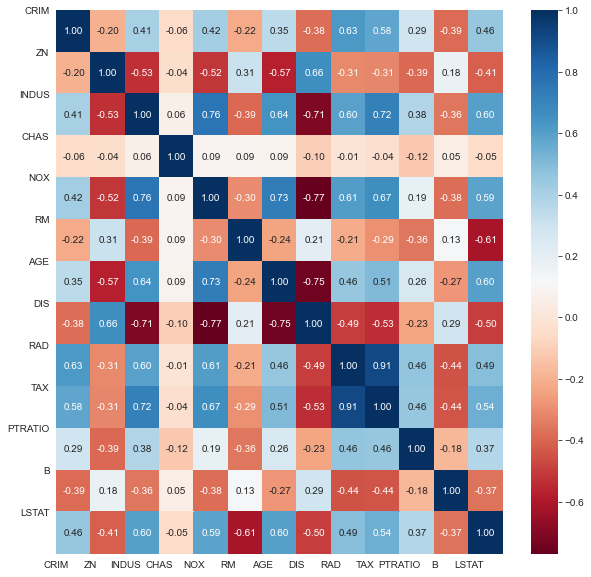

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

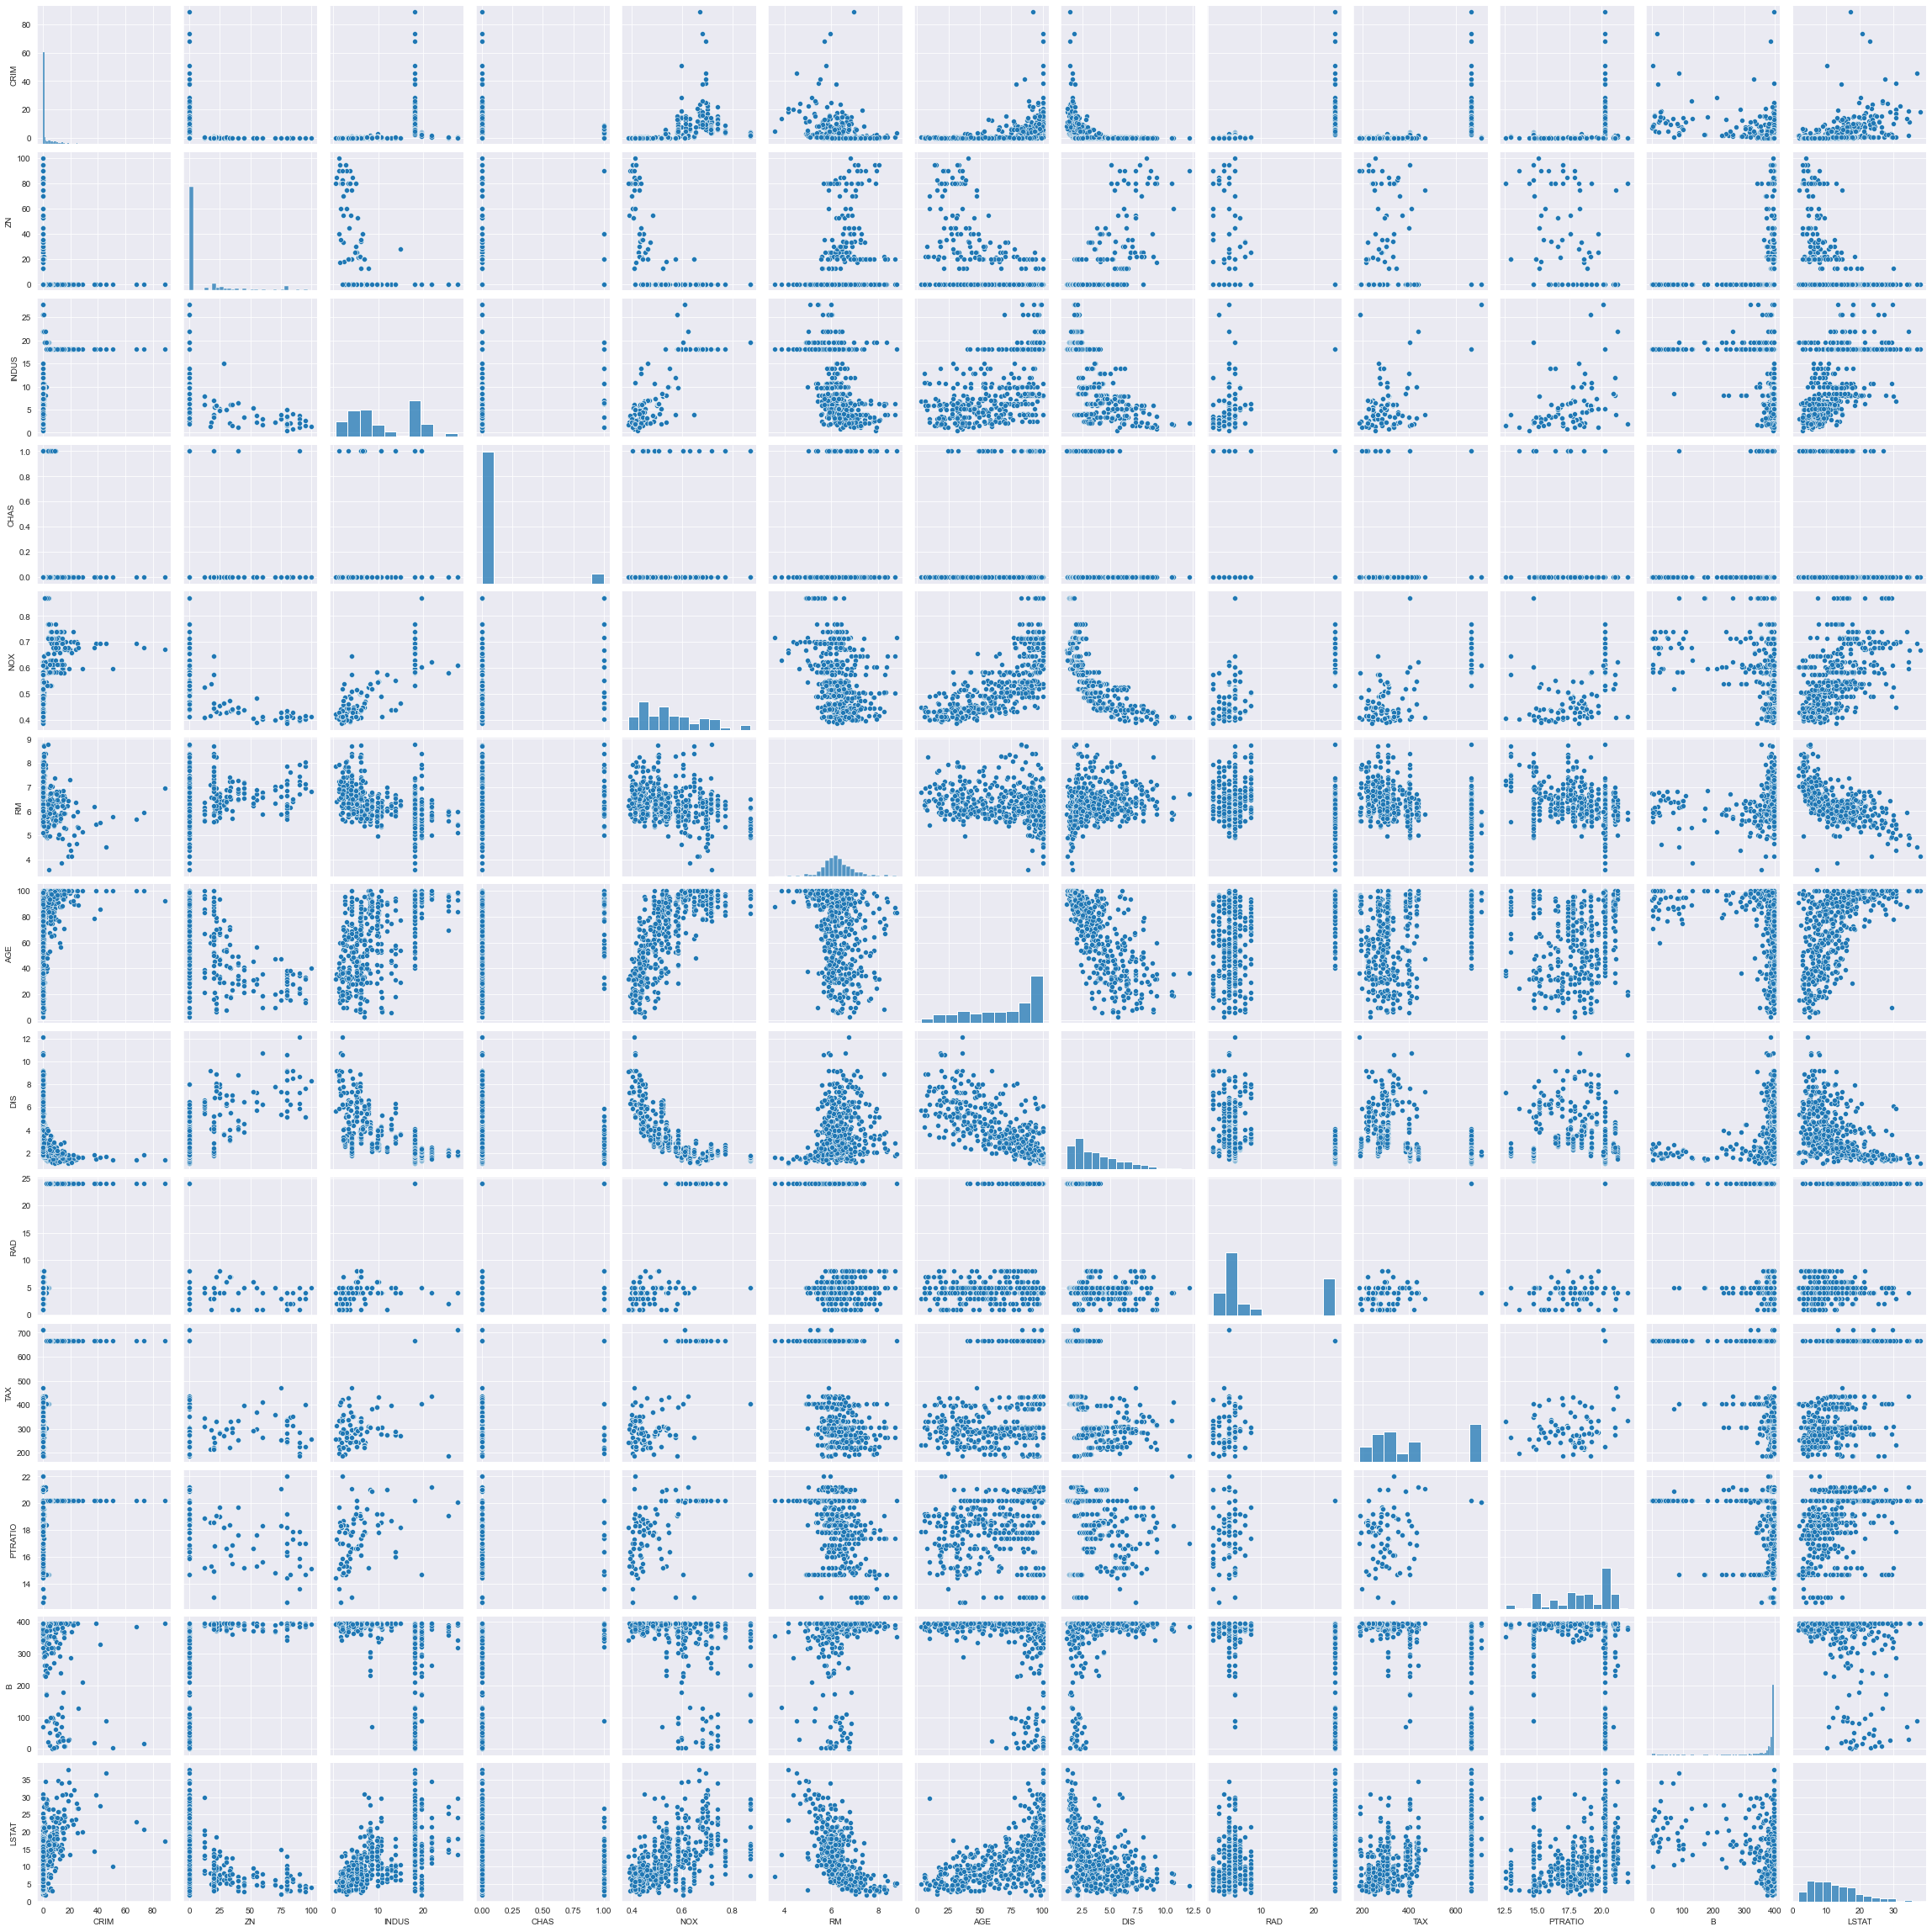

In [32]:
sns.pairplot(df)
plt.show()

## 4. Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## 5. Try Ridge and Lasso Regression models with at least 5 different alpha value for each.

In [38]:
from sklearn.linear_model import LinearRegression

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [62]:
print("Score of the train set",regression_model.score(X_train,y_train))
print("Score of the test set",regression_model.score(X_test,y_test))

Score of the train set 0.7434997532004697
Score of the test set 0.7112260057484932


## Ridge Regression

In [63]:
from sklearn.linear_model import Ridge, Lasso

In [64]:
ridge_model = Ridge(alpha = 0.02)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef: {ridge_model.coef_}')

Ridge model coef: [-1.33268325e-01  3.58484549e-02  4.83016687e-02  3.11482496e+00
 -1.51257235e+01  4.05814278e+00 -1.10753008e-02 -1.38158181e+00
  2.42021805e-01 -8.72686117e-03 -9.07418824e-01  1.18013519e-02
 -5.47680892e-01]


## Lasso Regression

In [65]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
print(f'Lasso model coef: {lasso_model.coef_}')

Lasso model coef: [-1.33223207e-01  3.58541994e-02  4.80415001e-02  3.10218343e+00
 -1.50654402e+01  4.05653876e+00 -1.10833360e-02 -1.38031239e+00
  2.41912162e-01 -8.73200965e-03 -9.06764520e-01  1.18043635e-02
 -5.47993456e-01]


## 6. Evaluate the results of all models and choose the best performing model.

In [66]:
print("Simple Train: ", regression_model.score(X_train, y_train))
print("Simple Test: ", regression_model.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Simple Train:  0.7434997532004697
Simple Test:  0.7112260057484932
*************************
Lasso Train:  0.7434954195159735
Lasso Test:  0.7110394345928663
*************************
Ridge Train:  0.7434969073574276
Ridge Test:  0.7110441931030484
